# 02 Parametric Regression Models

Apart from nonparametric estimators for survival functions (e.g. KM), we can fit the survival function with parametric models. 

## Parametric Distributions

### Distributions

Recall the definition of the hazard function: $\lambda(t) = \frac{f(t)}{S(t)}$.


#### Exponential Distribution

Exponential distribution with parameter $\lambda$ has C.D.F. $F(t) = 1 - e^{-\lambda t}$ and survival function $S(t) = e^{-\lambda t}$. Its density is $f(t) = \lambda e^{-\lambda t}$ and its hazard is $\lambda(t) =\lambda$, a constant.


We can (empirically) check whether a survival function is an exponential distribution by taking logarithm, since $\log S(t) = -\lambda t$ should be linear for exponential family.

#### Weibull Distribution

Weibull is a generalization of exponential distribution. It has survival function $S(t) = e^{-(\lambda t)^\gamma}$. Its hazard is $\lambda(t) = \lambda \gamma (\lambda t)^{\gamma - 1}$. It degnerates to the exponential distribution when $\lambda = 1$.

Since $\log(-\log S(t)) =\gamma\log t+\gamma\log\lambda$, we can check whether a survival function looks like weibull distribution by checking whether $(\log t, \log(-\log S(t)))$ is linear.

#### Log-Normal Distribution

Define $\Phi(x) = \frac{1}{\sqrt{2\pi}}\displaystyle \int_{-\infty}^x e^{-\frac{u^2}{2}}du$. The log-normal distribution has survival function $S(t) = 1 - \Phi(\gamma\log\lambda t)$, density 

$$f(t) = -S'(t) = \frac{1}{\sqrt{2\pi}}\frac{\gamma}{t}e^{-\frac 12\gamma^2(\log\lambda t)^2}.$$

And the hazard function is $\lambda(t) = f(t)/ S(t)$.

#### Log-Logistic Distribution

Log-logistic has survival function $S(t) = \frac{1}{1+(\lambda t)^\gamma}$ and density $f(t) = \frac{\lambda \gamma (\lambda t)^{\gamma - 1}}{(1+(\lambda t)^\gamma )^2}$ and hazard function $\lambda(t) = \frac{f(t)}{S(t)} = \frac{\lambda \gamma (\lambda t)^{\gamma - 1}}{1+(\lambda t)^\gamma }$.

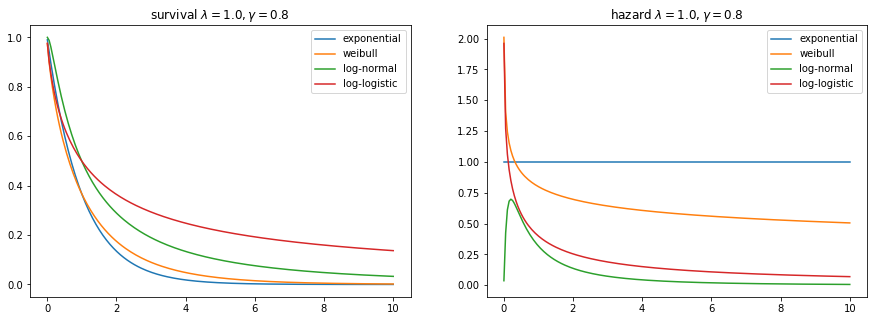

In [17]:
import numpy as np
from scipy.stats import norm
t = np.linspace(0.01, 10, 200)
survival = {
    'exponential': lambda t, l = 1, g = 1: np.exp(-l*t),
    'weibull': lambda t, l = 1, g = 1: np.exp(-(l*t)**g),
    'log-normal': lambda t, l = 1, g = 1: 1. - norm.cdf(g * np.log(l*t)),
    'log-logistic': lambda t, l = 1, g = 1: 1. / (1. + (l*t)**g)
}
hazard = {
    'exponential': lambda t, l = 1, g = 1: np.full_like(t, l),
    'weibull': lambda t, l = 1, g = 1: l * g * (l*t)**(g - 1),
    'log-normal': lambda t, l = 1, g = 1: norm.pdf(g * np.log(l * t)) * g / t,
    'log-logistic': lambda t, l = 1, g = 1: l * g / (l * t + (l * t)**(1 - g))
}

from matplotlib import pyplot as plt
lambda_, gamma_ = 1, .8
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1) and plt.title('survival $\\lambda = %.1f, \\gamma = %.1f$'%(lambda_, gamma_))
[plt.plot(t, d(t, lambda_, gamma_)) for name, d in survival.items()] and plt.legend(survival.keys())
plt.subplot(1,2,2) and plt.title('hazard $\\lambda = %.1f, \\gamma = %.1f$'%(lambda_, gamma_))
[plt.plot(t, d(t, lambda_, gamma_)) for name, d in hazard.items()]   and plt.legend(survival.keys())
plt.show()

### Logarithm Transform

If $T$ has distribution density $f_T(t)$. Let $Y = \log T$, then $Y$ has distribution density

$$f_Y(y) = \frac{\partial}{\partial y}\mathbb P(Y\leqslant y) = \frac{\partial}{\partial y}\mathbb P(T\leqslant e^y) = e^yf_T(e^y).$$

Moreover, if we let $W = \gamma(Y + \log\lambda)$ and $(\lambda T)^{\gamma} = e^W$, then it has density

$$f_W(w) = \frac{1}{\gamma} t f_T(t)\quad\quad {\rm where}\ \  (\lambda t)^\gamma = e^w$$

We can compute that:

For Weibull distribution, $f_W(w) =  we^{-w}$.

For log-normal distribution, $W\sim N\left(0,1\right)$.

For logistic distribution, $f_W(w) = \dfrac{e^w}{(1+e^{w})^2}$.